### Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

Do your work in a notebook named explore_telco. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_telco_data
from wrangle import get_telco_data

In [ ]:
# plt rc sets defaults for matplotlib figures
plt.rc("font", size=13)
plt.rc("figure", figsize= (13,7))

In [3]:
df = get_telco_data()
df.head().T

,0,1,2,3,4
customer_id,0003-MKNFE,0013-MHZWF,0015-UOCOJ,0023-HGHWL,0032-PGELS
gender,Male,Female,Female,Male,Female
senior_citizen,0,0,1,1,0
partner,No,No,No,No,Yes
dependents,No,Yes,No,No,Yes
tenure,9,9,7,1,1
phone_service,Yes,Yes,Yes,No,No
multiple_lines,Yes,No,No,No phone service,No phone service
internet_service_type_id,1,1,1,1,1
online_security,No,No,Yes,No,Yes


# 1. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [63]:
df = get_telco_data()
df = df[['monthly_charges','tenure', 'churn','internet_service_type_id']]
df = df.loc[:,~df.columns.duplicated()] 

In [26]:
df.internet_service_type_id = df.internet_service_type_id.replace(1,"DSL")
df.internet_service_type_id = df.internet_service_type_id.replace(2,"fiber")
df.internet_service_type_id = df.internet_service_type_id.replace(3,"none")
df.head()

,monthly_charges,tenure,churn,internet_service_type_id
0,59.9,9,No,DSL
1,69.4,9,No,DSL
2,48.2,7,No,DSL
3,25.1,1,Yes,DSL
4,30.5,1,Yes,DSL


In [47]:
df = df.rename(columns={'internet_service_type_id': 'internet_service'})
df.head()

,monthly_charges,tenure,churn,internet_service
0,59.9,9,No,DSL
1,69.4,9,No,DSL
2,48.2,7,No,DSL
3,25.1,1,Yes,DSL
4,30.5,1,Yes,DSL


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
train_and_validate, test = train_test_split(df, test_size =.15, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)

In [50]:
train.shape, validate.shape, test.shape

((4788, 4), (1198, 4), (1057, 4))

In [51]:
def telco_split():
    train_and_validate, test = train_test_split(df, test_size =.15, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)

In [64]:
def telco_prep():
    df = get_telco_data()
    df = df[['monthly_charges','tenure', 'churn','internet_service_type_id']]
    df = df.loc[:,~df.columns.duplicated()] 
    df.internet_service_type_id = df.internet_service_type_id.replace(1,"DSL")
    df.internet_service_type_id = df.internet_service_type_id.replace(2,"fiber")
    df.internet_service_type_id = df.internet_service_type_id.replace(3,"none")
    df = df.rename(columns={'internet_service_type_id': 'internet_service'})
    train_and_validate, test = train_test_split(df, test_size =.15, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)
    return train, validate, test

In [52]:
train['total_charges'] = train['monthly_charges'] * train['tenure']
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,monthly_charges,tenure,churn,internet_service,total_charges
357,69.20,14,No,DSL,968.80
6510,25.45,71,No,none,1806.95
1659,70.15,38,Yes,DSL,2665.70
4655,100.05,22,No,fiber,2201.10
6133,20.15,22,No,none,443.30


In [53]:
def plot_varibles_pairs(df):
    '''
    This function will return a pair grid of the parameters in the df
    '''     
    g = sns.PairGrid(df)    
    g.map_diag(sns.distplot)    
    g.map_offdiag(sns.regplot, scatter_kws={"color": "dodgerblue"}, line_kws={"color": "orange"})

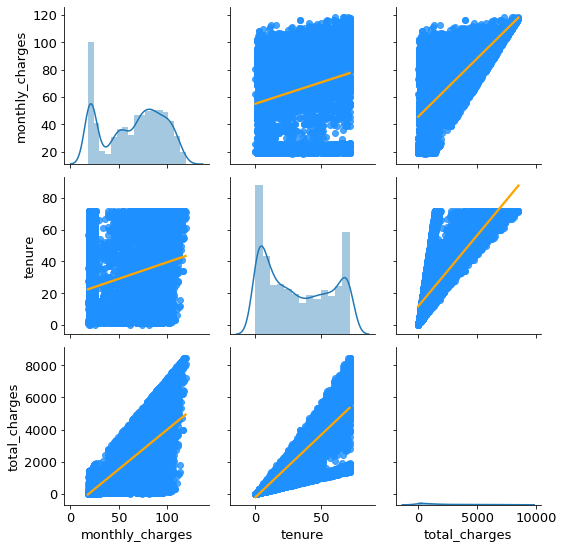

In [54]:
plot_varibles_pairs(train)

# 2. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [55]:
train['tenure_years'] = round(train['monthly_charges']/12,2)
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,monthly_charges,tenure,churn,internet_service,total_charges,tenure_years
357,69.20,14,No,DSL,968.80,5.77
6510,25.45,71,No,none,1806.95,2.12
1659,70.15,38,Yes,DSL,2665.70,5.85
4655,100.05,22,No,fiber,2201.10,8.34
6133,20.15,22,No,none,443.30,1.68


In [56]:
def month_to_years(df):
    '''
    This function returns tenure in years
    '''
    df['tenure_years'] = round(df['monthly_charges']/12,2)

# 3. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

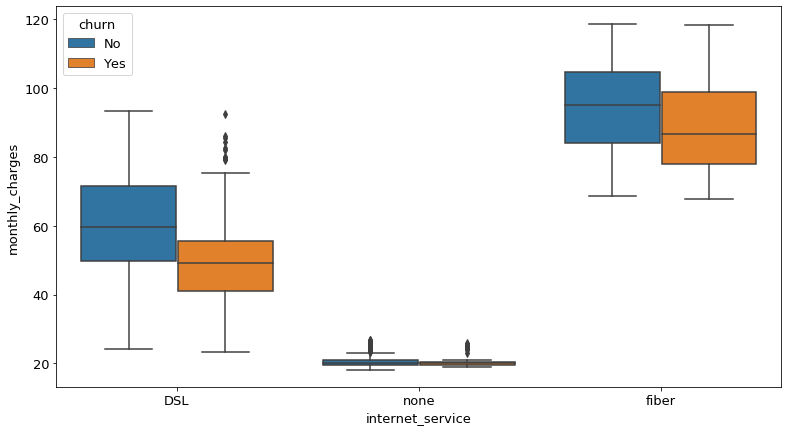

In [58]:
#y='monthly_charges'
#x='internet_service_type_id'
#hue='churn'
#data=train
sns.boxplot(data=train,y='monthly_charges',x='internet_service',hue='churn')

Text(0, 0.5, 'Customer Count')

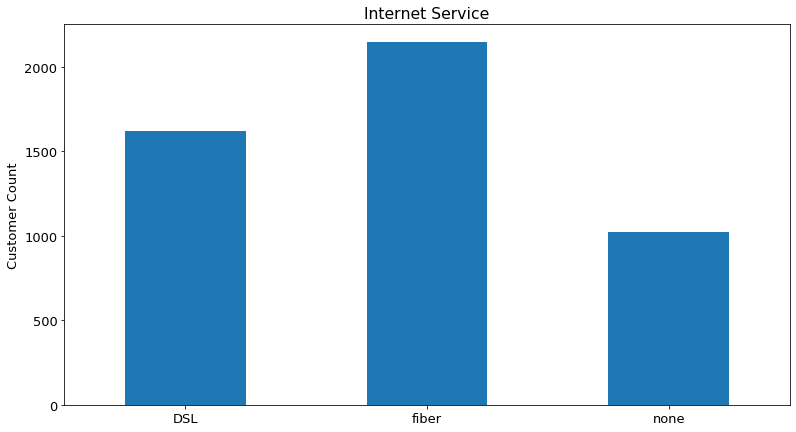

In [59]:
train.internet_service.value_counts().sort_index().plot.bar()
plt.xticks(rotation=0)
plt.title("Internet Service")
plt.ylabel("Customer Count")

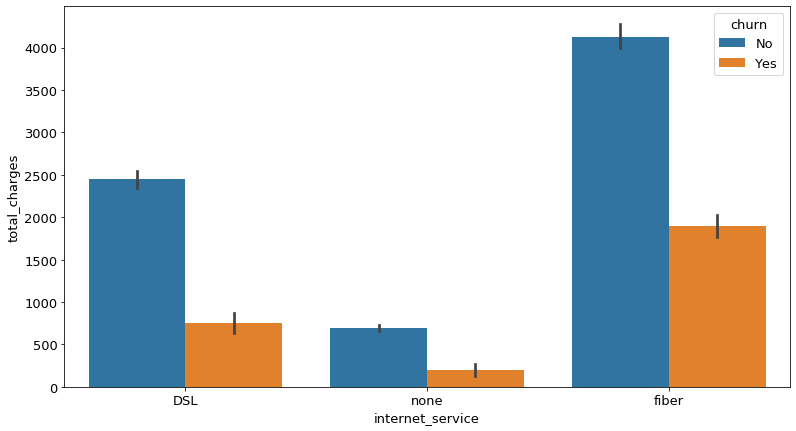

In [61]:
sns.barplot(data=train, y='total_charges', x='internet_service',hue='churn')

In [62]:
def plot_categorical_and_continuous_vars(df, cat, cont):
    '''
    This function will return 3 plots when provided a df, categorical var (x) and continuous var(y)
    '''
    plt.rc('figure', figsize = (18,8))

    plt.subplot(221)
    sns.boxplot(data=df,y=cont,x=cat)
    plt.subplot(222)
    sns.swarmplot(data=df,y=cont,x=cat)   
    plt.subplot(223)
    sns.barplot(data=df, y=cont, x=cat)

# 4. Save the functions you have written to create visualizations in a file named explore.py. Rewrite your notebook code so that you are using the functions imported from this file.

# 5. Explore your dataset with any other visualizations you think will be helpful.

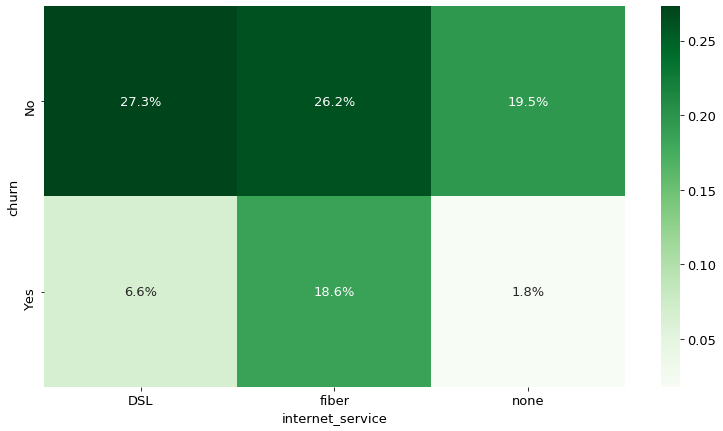

In [65]:
ctab = pd.crosstab(train.churn, train.internet_service, normalize=True)
sns.heatmap(ctab, cmap='Greens', annot=True, fmt='.1%')

In [66]:
pd.crosstab(train.internet_service, train.churn, normalize='columns')

churn,No,Yes
internet_service,,
DSL,0.373642,0.244186
fiber,0.359062,0.689147
none,0.267296,0.066667


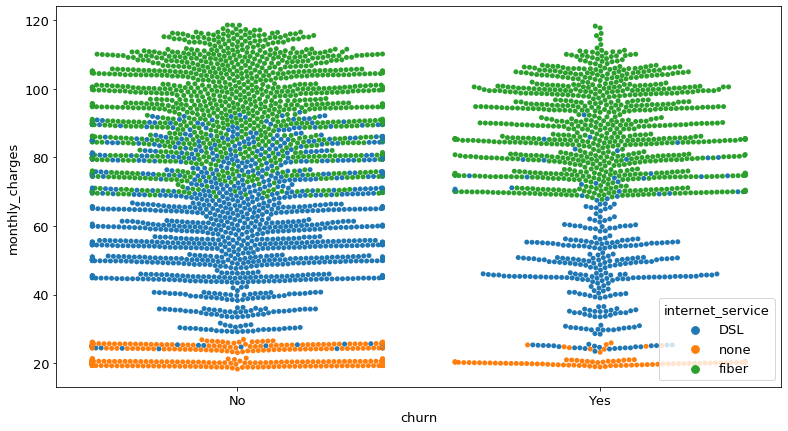

In [68]:
sns.swarmplot(data=train, y='monthly_charges', x='churn', hue='internet_service')

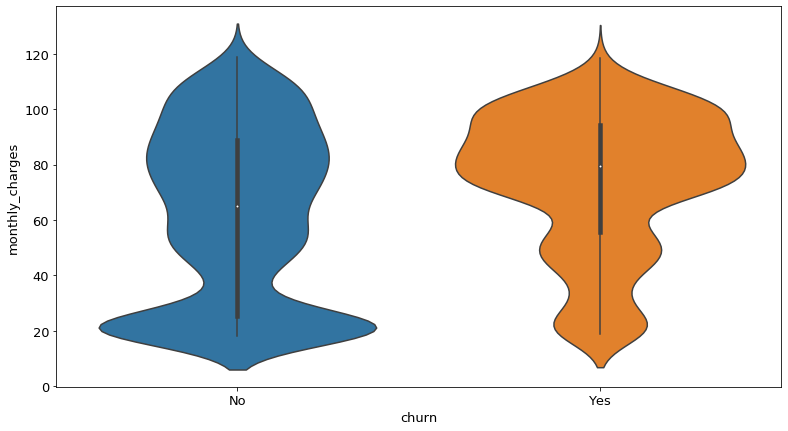

In [69]:
sns.violinplot(data=train, y='monthly_charges', x='churn')

In [74]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   explore.py
	modified:   explore_telco.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	mall_practice.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [75]:
!git add -A

In [76]:
!git commit -m "Added some edits to explore and worked with the function on the mall data"

[master cf8001d] Added some edits to explore and worked with the function on the mall data
 3 files changed, 777 insertions(+), 3 deletions(-)
 create mode 100644 mall_practice.ipynb


In [73]:
!git push

Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 8 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 394.04 KiB | 8.21 MiB/s, done.
Total 5 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/george887/regression-exercises.git
   2186481..1d4fe19  master -> master
